<a href="https://colab.research.google.com/github/mingshey/python_projects/blob/main/Refraction_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물 속 공간의 굴절상





* 목표: 물 속 공간을 격자 모양으로 구획하여 물 밖에서 본 상의 모습을 구한다.
* 문제의 단순화: 물체와 관측점을 포함하는 2차원 법평면(normal plane)을 xy평면으로 하고, 수면은 y=0인 평면 즉 x축을 지나는 것으로 가정하여 y <= 0 인 영역을 물로, y > 0 인 영역을 공기로 가정한다.
* 방법:
1. 관측점(POV, 수면 위)와 물 속 물체의 위치(OBJ)가 주어졌을 때 페르마 원리(최소 시간 원리)를 이용하여 입사점(POI; point of incidence)의 x좌표를 구한다.
2. 물체에서 입사점 근방 두 점으로 나오는 광선 각각의 굴절각을 이용하여 물 밖으로 굴절하여 나오는 광선 각각의 1차 방정식을 구한다.
3. 두 방정식을 연립하여 풀어 상의 위치를 구한다.
4. 1~3 과정을 함수로 만든다.
5. 4에서 만든 함수를 이용하여 물속 격자의 상을 구한다.

## 페르마 원리


<img src="https://drive.google.com/uc?id=164RFN7hof6MAWYIuxDvg9aomIFESYGY2"
width=300 >




물 밖과 물 속 경로의 길이는 각각

${path}_1 = \sqrt{(x-A)^2 + B^2}$

${path}_2 = \sqrt{(C-x)^2 + D^2}$

이고 각 경로를 지나는 시간은 각 매질에서 빛의 속력을 $v_1$, $v_2$라 하면,

$t_1 = \dfrac{{path}_1}{v_1}$

$t_2 = \dfrac{{path}_2}{v_2}$

따라서 전체 시간은

$t = t_1 + t_2 = \dfrac{1}{v_1}\sqrt{(x-A)^2 + B^2} + \dfrac{1}{v_2}\sqrt{(C-x)^2 + D^2}$

이다.

전체 시간에 상수인 진공 중 빛의 속력 $c$를 곱하면

$ct = \dfrac{c}{v_1}\sqrt{(x-A)^2 + B^2} + \dfrac{c}{v_2}\sqrt{(C-x)^2 + D^2}$,


즉,

$ct = {n_1}\sqrt{(x-A)^2 + B^2} + {n_2}\sqrt{(C-x)^2 + D^2}$.

페르마 원리에서 시간 $t$를 최소로 만드는 경로는 $ct$도 최소로 만들 것이므로 이 $ct$ 값을 편의상 $t$라고 하자. 즉,

$t = {n_1}\sqrt{(x-A)^2 + B^2} + {n_2}\sqrt{(C-x)^2 + D^2}$.

$t$가 최소인 경로는 $t$를 $x$로 미분했을 때 0이 되는 $x$이므로,

$\newcommand{\diff}[2]{{\frac{\mathrm{d}#1}{\mathrm{d}#2}}}$


$$\diff{t}{x} = \dfrac{n_1 (x-A)}{\sqrt{B^2+(x-A)^2}} + \dfrac{n_2 (x-C)}{\sqrt{D^2 + (x-C)^2}}=0$$

인 $x$를 구하면 $(x, 0)$이 빛이 경계면에 입사하는 입사점이다.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
import scipy as sci

In [ ]:
plt.style.use(['default'])

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
sym.init_printing()

In [ ]:
# 각각 공기와 물의 굴절률
n_air, n_water = 1.00, 1.33

In [ ]:
N1, N2, A, B, C, D, x = sym.symbols('n_1, n_2, A B C D x')
N1, N2, A, B, C, D, x

(n₁, n₂, A, B, C, D, x)

In [ ]:
# 입사점 기준으로 물 밖, 물 속, 각각의 경로 길이
path1 = sym.sqrt((x-A)**2 + B**2)
path2 = sym.sqrt((C-x)**2 + D**2)

# 전체 시간 (에 진공중의 광속을 곱한 값)
t = N1*path1 + N2*path2

# t을 계산 가능한 함수로 만든 것:
tf = sym.lambdify((x, N1, N2, A, B, C, D), t)

In [ ]:
t

      ________________         _______________
     ╱  2           2         ╱  2          2 
n₁⋅╲╱  B  + (-A + x)   + n₂⋅╲╱  D  + (C - x)  

In [ ]:
# 전체 시간 t의 x에 대한 미분 dt/dx
dtdx = sym.diff(t, x)

# dtdx을 계산 가능한 함수로 만든 것:
dtdxf = sym.lambdify((x, N1, N2, A, B, C, D), dtdx)

In [ ]:
dtdx

    n₁⋅(-A + x)          n₂⋅(-C + x)    
─────────────────── + ──────────────────
   ________________      _______________
  ╱  2           2      ╱  2          2 
╲╱  B  + (-A + x)     ╲╱  D  + (C - x)  

- 수치 해 (Numerical solution, 수치스러운 해가 아님.)

$$\diff{t}{x} = \dfrac{n_1 (x-A)}{\sqrt{B^2+(x-A)^2}} + \dfrac{n_2 (x-C)}{\sqrt{D^2 + (x-C)^2}}=0$$

의 해를 해석적으로 정확히 구하려면 $x$의 4차 방정식을 풀면 되지만, 풀이 과정이 복잡하고, 물리학적인 직관을 주지 못한다. 따라서 근사적인 해를 수치적인 방법으로 구하는 것이 실용적으로 충분한 방법이라고 판단되어, 후자를 선택하기로 한다.

In [ ]:
pov = [0, 1]  # POV (관측점)
obj = [1, -1] # OBJ (물체)

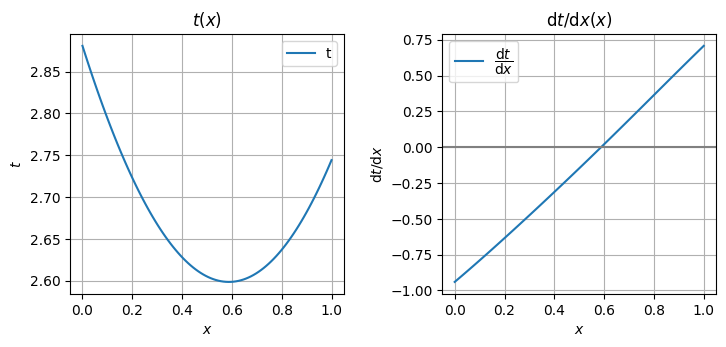

In [ ]:
xs = np.linspace(0, 1, 100)
a, b = pov[0], pov[1]
c, d = obj[0], obj[1]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(pad=4)

axes[0].plot(xs, tf(xs, n_air, n_water, a, b, c, d), label='t')
axes[0].grid()
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$t$')
axes[0].title.set_text(r'$t(x)$')
axes[0].legend()

axes[1].plot(xs, dtdxf(xs, n_air, n_water, a, b, c, d), label=r'$\dfrac{\mathrm{d}t}{\mathrm{d}x}$')
axes[1].axhline(0, c='gray')
axes[1].grid()
axes[1].set_xlabel(r'$x$')
axes[1].set_ylabel(r'$\mathrm{d}t/\mathrm{d}x$')
axes[1].title.set_text(r'$\mathrm{d}t/\mathrm{d}x(x)$')
axes[1].legend()

plt.show()

In [ ]:
sol = sci.optimize.root(lambda x: dtdxf(x, n_air, n_water, a, b, c, d), c)
sol.x[0]

0.5878671239391607

In [ ]:
tf(sol.x[0], n_air, n_water, a, b, c, d)

2.5985196157340535

In [ ]:
dtdxf(sol.x[0], n_air, n_water, a, b, c, d)

0.0

0.5878671239391607


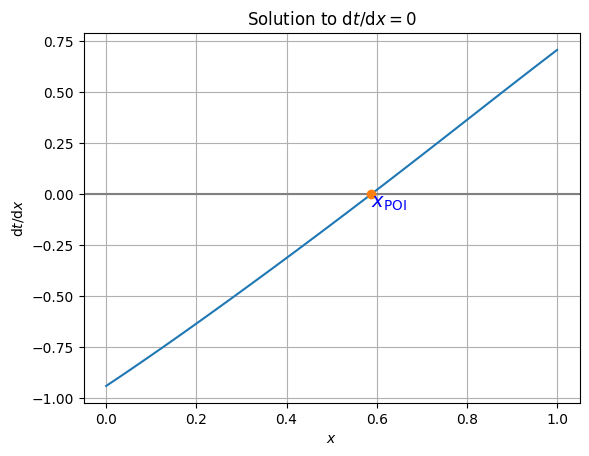

In [ ]:
func1 = lambda x: dtdxf(x, n_air, n_water, a, b, c, d)

sol = sci.optimize.root(func1, obj[0], tol=1e-9)
xPOI = sol.x[0]
print(xPOI)

xs = np.linspace(0, 1, 100)
plt.plot(xs, func1(xs))
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{d}t/\mathrm{d}x$')
plt.axhline(0,c='gray')

plt.plot(xPOI, 0, 'o')
plt.text(xPOI, 0, r'$x_{\mathrm{POI}}$', va='top', c='b', fontsize=14)
plt.title(r'Solution to $\mathrm{d}t/\mathrm{d}x = 0$')

plt.show()

In [ ]:
# 굴절 법칙을 만족하는지 확인

sin1 = (pov[0] - xPOI) / np.sqrt((xPOI - pov[0])**2 + pov[1]**2)
sin2 = -(obj[0] - xPOI) / np.sqrt((xPOI - obj[0])**2 + obj[1]**2)
print(f"n1 sin1 - n2 sin2 = {n_air*sin1 - n_water*sin2}")

n1 sin1 - n2 sin2 = 0.0


In [ ]:
# 광선의 경로
pts = np.array([obj, [xPOI, 0], pov])

Text(0.5878671239391607, 0, 'POI')

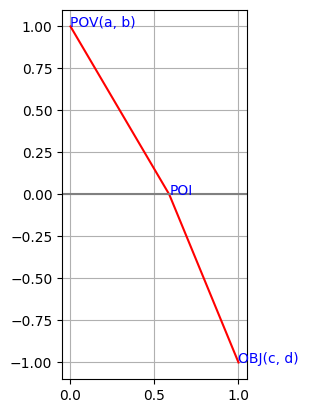

In [ ]:
# 광선의 경로를 그려 본다
plt.axes().set_aspect('equal')
plt.plot(pts.T[0], pts.T[1], 'r')
plt.axhline(0, c='gray')
plt.grid()
plt.text(a, b, 'POV(a, b)', color='b')
plt.text(c, d, 'OBJ(c, d)', color='b')
plt.text(xPOI, 0, 'POI', color='b')

## 입사점 근처 두 점을 경유하여 물 밖으로 나온 두 광선의 방정식

In [ ]:
# 입사점 근방으로 나오는 다른 광선의 경로
delta = 3e-2
xm, xp = xPOI - delta, xPOI + delta
x2, y2 = obj
dxm = xm - x2
dxp = xp - x2
d = y2

sin2m = dxm / np.sqrt(dxm**2 + d**2)
sin2p = dxp / np.sqrt(dxp**2 + d**2)

# 스넬 법칙
sin1m = n_water / n_air * sin2m
sin1p = n_water / n_air * sin2p

# 전반사되는 경우는 제대로 예외 처리 해야 하나
# 물체에서 관측점으로 광선이 도달하는 경우를 중심으로
# 미세한 변화만을 준 것이므로 전반사는 없는 것으로 간주하여
# 여기서는 대충 얼버무리기로 한다.
if sin1m > 1:
  sin1m = 1
if sin1p > 1:
  sin1p = 1

# 굴절광선(물 밖) 방향으로 길이 1인 각 선분의 끝 점(s1m, s1p)을 구한다.
x1m = sin1m
x1p = sin1p

y1m = np.sqrt(1-x1m**2)
y1p = np.sqrt(1-x1p**2)

s1m = np.array([xm+x1m, y1m])
s1p = np.array([xp+x1p, y1p])

In [ ]:
# 입사점 근방으로 나오는 두 광선의 1차 방정식 계수
pcm = np.polyfit(np.array([xm, xm+x1m]), np.array([0, y1m]), 1)
pcp = np.polyfit(np.array([xp, xp+x1p]), np.array([0, y1p]), 1)

In [ ]:
print(pcm)
print(pcp)

[-1.56756984  0.87449568]
[-1.85383977  1.14542665]


In [ ]:
pfm = np.poly1d(pcm)
pfp = np.poly1d(pcp)
print( pfm )
print( pfp )

 
-1.568 x + 0.8745
 
-1.854 x + 1.145


## 상의 좌표

In [ ]:
#두 1차 방정식의 연립 해(수치 해):

eqn2 = lambda x: pfm(x) - pfp(x)
sol2 = sci.optimize.root(eqn2, c)
ix = sol2.x[0]
iy = np.poly1d(pcm)(ix)
print(ix, iy)

0.9464178427677785 -0.6090803888696094


연립 방정식
$$ \left\{\begin{aligned}
y &= kx+m\\
y &= lx+n \end{aligned} \right. $$
의 해는

$ (k - l) x  + (m - n) = 0$ 에서

$ x = -\dfrac{m - n}{k - l}$

$ y = -k\dfrac{m-n}{k-l}+m =\dfrac{k n-l m}{k-l}$

이므로,

In [ ]:
k, m = pcm
l, n = pcp
ix = - (m - n) / (k - l)               # 상의 x 좌표
iy = (k * n - l * m) / (k - l)         # 상의 y 좌표
print(ix, iy)

0.9464178427677782 -0.6090803888696085


In [ ]:
# 같은 계산을 아래와 같이 할 수도 있다.
# 그러나 코드 가독성이 떨어짐. (...X)

k_l, m_n = pcm - pcp    # 각각 k - l 과 m - n
ix = - m_n / k_l
iy = np.cross(pcm, pcp) / k_l
print(ix, iy)

0.9464178427677782 -0.6090803888696085


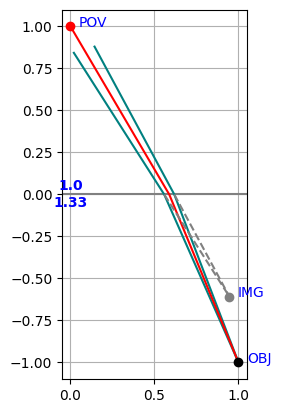

In [ ]:
# POV(관측점)와 물체(OBJ)를 잇는 광선 및 입사점(POI) 근처로 나오는 광선 및
# 두 광선의 굴절 후 경로의 연장선 및 교점(IMG; 상)을 그려 본다
plt.axes().set_aspect('equal')

plt.axhline(0, c='gray')
plt.text(pov[0], 0.01, str(n_air), color='b', va='bottom', ha='center', weight='bold')
plt.text(pov[0], -0.01, str(n_water), color='b', va='top', ha='center', weight='bold')

plt.grid()
pathm = np.array([obj, [xm, 0], s1m])
pathp = np.array([obj, [xp, 0], s1p])

plt.plot(pathm.T[0], pathm.T[1], 'teal')
plt.plot(pathp.T[0], pathp.T[1], 'teal')
plt.plot(pov[0], pov[1], 'o', color='r', zorder=4)
plt.plot(obj[0], obj[1], 'o', color='k', zorder=4)
plt.text(pov[0]+0.05, pov[1], 'POV', color='b')
plt.text(obj[0]+0.05, obj[1], 'OBJ', color='b')

plt.plot([xm, ix], [0, iy],color='gray', linestyle='--', zorder=3)
plt.plot([xp, ix], [0, iy],color='gray', linestyle='--', zorder=3)
plt.plot(ix, iy, 'o', color='gray', zorder=4)
plt.text(ix+0.05, iy, 'IMG', color='b')

plt.plot(pts.T[0], pts.T[1], 'r')

이 방법에 따라 상의 좌표를 구하는 함수를 만들면 아래와 같다:

In [ ]:
# 상의 위치를 구하는 함수
# 물체의 위치와 관측점 및 상대 굴절률을 입력으로 받아 상의 위치를 반환하는 함수

def refimg_mp(pov, obj, nrel):
  '''
  pov: [xp, yp]; 관측점
  obj: [xo, yo]; 물체의 위치
  nrel: POV가 속한 매질에 대한 OBJ가 속한 매질의 상대굴절률, nrel = nPOV / nOBJ
        예: POV가 n1에, OBJ가 n2에 있을 때, nrel=n2/n1
  '''
  xp, yp = pov[0], pov[1]
  xo, yo = obj[0], obj[1]
  xPOI = sci.optimize.root(lambda x: dtdxf(x, 1, nrel, xp, yp, xo, yo), xo).x[0]

  delta = 1e-8
  xm, xp = xPOI - delta, xPOI + delta
  dxm = xm - xo
  dxp = xp - xo
  d = yo

  sin2m = dxm / np.sqrt(dxm**2 + d**2)
  sin2p = dxp / np.sqrt(dxp**2 + d**2)

  sin1m = nrel * sin2m
  sin1p = nrel * sin2p

  if sin1m > 1:
    sin1m = 1
  if sin1p > 1:
    sin1p = 1

  x1m = sin1m
  x1p = sin1p

  # 굴절 광선의 방향은 POV를 향하므로 아래 식에서 np.sign()함수를 사용하여 이를 반영해 준다:
  y1m = np.sqrt(1-x1m**2) * np.sign(pov[1])
  y1p = np.sqrt(1-x1p**2) * np.sign(pov[1])

#  s1m = np.array([xm+x1m, y1m])
#  s1p = np.array([xp+x1p, y1p])

  pcm = np.polyfit(np.array([xm, xm + x1m]), np.array([0, y1m]), 1)
  pcp = np.polyfit(np.array([xp, xp + x1p]), np.array([0, y1p]), 1)

  k, m = pcm
  l, n = pcp

  ix = -(m - n) / (k - l)
  iy = (k * n - l * m) / (k - l)

  return np.array([ix, iy])

In [ ]:
refimg_mp([0,1], [1,-1], n_water/n_air)

array([ 0.94617529, -0.60950537])

## 상의 좌표 (2)

### 상의 좌표는 입사점을 알면 다음과 같이 해석적으로 정확히 구할 수도 있다:

 POI$(x_{\mathrm{POI}}, 0)$와 POV$(A, B)$를 지나는 직선의 기울기를 $k$라 할 때
 $$k=\cot \theta_1$$
 이고,
 직선의 방정식은
 $$y=k(x-x_{\mathrm{POI}})$$
 이다.

$\newcommand{\nrel}{{n_{\mathrm{rel}}}}$
$\newcommand{\xpoi}{{x_{\mathrm{POI}}}}$
굴절 법칙에서 $$\sin\theta_1 =  \nrel \sin\theta_2$$이고, (여기서, $n_{\mathrm{rel}}= \frac{n_2}{n_1}$)

$$\tan \theta_2 = \frac{x_{\mathrm{POI}} - C}{D}$$이므로,

$$\theta_1 = \arcsin \left( \nrel \sin\theta_2 \right),$$

$$k = \cot \theta_1 = \cot\left\{ \arcsin \left( \nrel \sin\theta_2 \right) \right\} = \dfrac{\sqrt{1 - \nrel^2 \sin^2 \theta_2}}{\nrel\sin\theta_2}$$

$ \alpha \equiv \xpoi - C$ 라 하면,

$$\tan \theta_2 = \frac{\xpoi - C}{D} = \frac{\alpha}{D},$$
$$ \sin\theta_2 = \frac{\alpha}{\sqrt{D^2+\alpha^2}} $$
이므로,

굴절광선의 연장선이 $x=C$인 직선과 만나는 점의 $y$좌표 $\beta$는
$$\begin{aligned}
\beta &= k(C-\xpoi)\\
  &= -D\dfrac{\sin\theta_2}{\cos\theta_2}\dfrac{\sqrt{1 - \nrel^2 \sin^2 \theta_2}}{\nrel\sin\theta_2}
\end{aligned}
$$

이고, 여기서 $K =  \dfrac{\alpha}{D/\sqrt{\nrel^2-1}}$, $H=\dfrac{\beta}{D/\nrel}$ 이라 하면,

$$
\begin{aligned}
K^2 + H^2 &= \dfrac{\nrel^2-1}{D^2}\alpha^2 + \dfrac{\nrel^2}{D^2}\beta^2\\
   &= \dfrac{\nrel^2-1}{D^2}D^2 \dfrac{\sin^2\theta_2}{\cos^2\theta_2} + \dfrac{\nrel^2}{D^2}D^2\dfrac{1-\nrel^2\sin^2\theta_2}{\nrel^2\cos^2\theta_2}\\
   &= \dfrac{\nrel^2\sin^2\theta_2-\sin^2\theta_2}{\cos^2\theta_2} + \dfrac{1-\nrel^2\sin^2\theta_2}{\cos^2\theta^2}\\
   &=\dfrac{1-\sin^2\theta_2}{\cos^2\theta_2}\\
   &= 1
\end{aligned}
$$
임을 알 수 있다.

가로 축 $\xi = \dfrac{x-C}{D/\sqrt{\nrel^2 - 1}}$, 세로 축 $\eta = \dfrac{y}{D/\nrel}$인 평면에서 점 $(K,0)$ 과 점$(0, H)$ 을 연결하는 선분이 $K^2 + H^2 = 1$을 만족시키며 움직일 때 만드는 포락선은 잘 알려진 astroid 곡선이다. 선분과 포락선의 접점의 좌표는 $(\xi, \eta) = (K^3, H^3)$이며, 이 곡선은 방정식 $$\xi^{2/3}+\eta^{2/3}=1$$을 만족한다.

<img src="https://drive.google.com/uc?id=1782xuOFLVSq4XuJ_TTVeIQjsXPEq3Skc"
width=350 >

여기서 상의 좌표 $(x,\ y)$는
$$ \left\{\begin{aligned}
x &= C + \dfrac{D}{\sqrt{\nrel^2 - 1}}K^3 \\
  &= C + (\nrel^2-1)\dfrac{\alpha^3}{D^2},\\
y &= \dfrac{D}{\nrel}H^3 = \dfrac{D}{\nrel}(1-K^2)^{3/2}\\
  &= \dfrac{D}{\nrel} \left\{1-\left(\nrel^2 - 1\right)\dfrac{\alpha^2}{D^2}\right\}^{3/2}
\end{aligned} \right.
$$
임을 알 수 있다.



### 직접 포락선의 방정식을 구하여 확인해 보자:

$$
\DeclareMathOperator{\sgn}{sgn}
\begin{aligned}
k &= \dfrac{\sqrt{1 - \nrel^2 \dfrac{\alpha^2}{D^2+\alpha^2}}}{\left(\nrel \dfrac{\alpha}{\sqrt{D^2+\alpha^2}}\right)} = \dfrac{\sqrt{D^2+\alpha^2 - \nrel^2 \alpha^2}}{\nrel \alpha}\\
&= \dfrac{\left| \alpha \right|}{\alpha} \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{\alpha^2}+1\right)-1} \\
&= \sgn( \alpha ) \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{\alpha^2}+1\right)-1}.
\end{aligned}$$

따라서 직선의 방정식은

$$ y = \sgn( \alpha ) \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{\alpha^2}+1\right)-1} (x-\alpha-C) .$$

<img src="https://drive.google.com/uc?id=1bixR5ljTIg3sgU1UQBZagCmBofdrx7h_"
width=450 >

물체의 위치를 기준으로 $\alpha$가 변할 때 위 직선의 변화에 따라 만들어지는 포락선 위의 점은 ${\partial y}/{\partial \alpha} = 0$을 만족하므로,

$$  \dfrac{\partial y}{\partial \alpha} = \sgn(\alpha)\left[ \dfrac{1}{2}\dfrac{-2\dfrac{1}{\nrel^2}\dfrac{D^2}{\alpha^3}}{\sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{\alpha^2}+1\right)-1}}(x-\alpha-C) - \dfrac{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{\alpha^2}+1\right)-1}{\sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{\alpha^2}+1\right)-1}}\right] = 0$$

$$ \begin{aligned}
x - \alpha - C &= \dfrac{\nrel^2 \alpha^3}{D^2} \left\{1 - \dfrac{1}{n_{\mathrm{rel}}^2}\left(\dfrac{D^2}{\alpha^2}+1 \right)\right\}\\
&=(n_{\mathrm{rel}}^2 - 1) \dfrac{\alpha^3}{D^2} - \alpha
\end{aligned}
$$

따라서 포락선은 매개변수 $\alpha$의 방정식으로 아래와 같이 주어진다:

$$ \left\{
\begin{array}{l}
x = C + (\nrel^2 - 1)\dfrac{\alpha^3}{D^2},\\
y = \dfrac{\left| \alpha \right|}{\alpha} \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{\alpha^2}+1\right)-1} \left\{\left(\nrel^2 - 1\right)\dfrac{\alpha^3}{D^2} - \alpha\right\}\\
\hphantom{y} = \sqrt{\dfrac{1}{\nrel^2}\left(D^2+\alpha^2\right)-\alpha^2} \left\{\left(\nrel^2 - 1\right)\dfrac{\alpha^2}{D^2} - 1\right\}\\
\hphantom{y} = -\dfrac{\left|D\right|}{\nrel} \left\{1-\left(\nrel^2 - 1\right)\dfrac{\alpha^2}{D^2}\right\}^{3/2}.
\end{array}
\right.
$$

$$ \left| \alpha \right| \le \dfrac{ \left| D \right|}{\sqrt{\nrel^2-1}} $$

이는 astroid 곡선을 이용하여 얻은 결과와 같다.

(e.g.) 여기서 $\alpha=0$일 때, $x=C$, $y=-\dfrac{\left|D\right|}{\nrel}$ 임을 알 수 있다.

포락선의 방정식을 정리하면, $D < 0$ 일 때 $\left| D \right| = -D$이므로,

$$ \xi = K^3 = \dfrac{\sqrt{\nrel^2-1}}{D}\left({x-C}\right) \equiv \left(\nrel^2 - 1\right)^{3/2}\dfrac{\alpha^3}{D^3} \mathrm{\ \ 이라\ 할\ 때},\\
\left\{
\begin{array}{l}
x = C + p\,\alpha,\\
y = \dfrac{D}{\nrel} \left( 1-p \right)^{3/2}.
\end{array}
\right.
$$

In [ ]:
# 위 방법으로 구한 상의 좌표:

alpha = xPOI - c
nrel = n_water/n_air
p = (nrel**2 - 1) * (alpha/d)**2
xi = c + p * alpha
yi = d / nrel * ( 1 - p ) ** 1.5
print(xi, yi)

0.9461752972190999 -0.6095053774720374


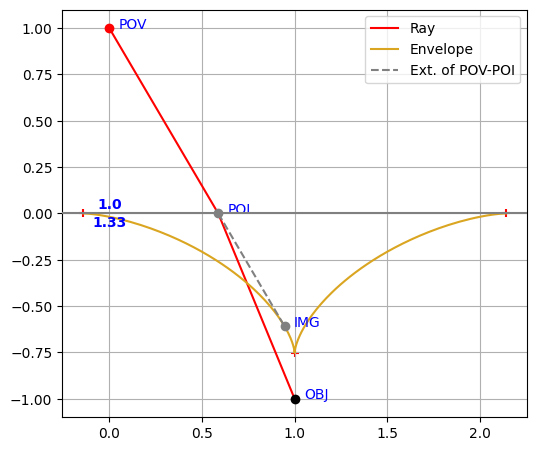

In [ ]:
# POV(관측점)와 물체(OBJ)를 잇는 광선 및 입사점(POI)이 변할 때
# 굴절 광선을 연장한 직선의 포락선을 그려 본다.

alphalim = np.abs(d) / np.sqrt((n_water/n_air)**2 - 1)
alphas = np.linspace(-alphalim, alphalim, 201)
ps = ((n_water/n_air)**2 - 1) * (alphas/d)**2
xis = c + ps * alphas
yis = -np.abs(d) / nrel * ( 1 - ps ) ** 1.5

plt.figure(figsize=(6, 9))
plt.axes().set_aspect('equal')
plt.grid()

# surface of water
plt.axhline(0, c='gray', zorder=4)

# refraction indices
plt.text(a, 0.01, str(n_air), color='b', va='bottom', ha='center', weight='bold')
plt.text(a, -0.01, str(n_water), color='b', va='top', ha='center', weight='bold')

# POV
plt.plot(a, b, 'o', color='r', zorder=4)
plt.text(a+0.05, b, 'POV', color='b')

# OBJ
plt.plot(c, d, 'o', color='k', zorder=4)
plt.text(c+0.05, d, 'OBJ', color='b')

# POI
plt.plot(xPOI, 0, 'o', color='gray', zorder=4)
plt.text(xPOI+0.05, 0, 'POI', color='b')

# IMG
plt.plot(xi, yi, 'o', color='gray', zorder=4)
plt.text(xi+0.05, yi, 'IMG', color='b')

# the ray from OBJ through POI to POV
plt.plot(pts.T[0], pts.T[1], 'r', label="Ray")

# envelope of the ray from POI to POV extended
plt.plot(xis, yis, 'goldenrod', label='Envelope')

# limits of the envelope
plt.scatter([c-alphalim, c+alphalim], [0,0], color='r', marker="+")
plt.scatter(c, d/nrel, color='r', marker="+")

# extension of the ray from POI to POV
plt.plot([xPOI, xi], [0, yi],color='gray', linestyle='--',\
         zorder=3, label="Ext. of POV-POI")

plt.legend()

plt.savefig('envelopes.png')
plt.savefig('envelopes.svg')

이와 같이 포락선 위의 점으로 상의 좌표를 구하는 함수를 만들면 아래와 같다:

In [ ]:
# 상의 위치를 구하는 함수
# 물체의 위치와 관측점 및 상대 굴절률을 입력으로 받아 상의 위치를 반환하는 함수

def refimg(pov, obj, nrel):
  '''
  pov: [a, b]; 관측점
  obj: [c, d]; 물체의 위치
  nrel: POV가 속한 매질에 대한 OBJ가 속한 매질의 상대굴절률, nrel = nOBJ / nPOV
        예: POV가 n1에, OBJ가 n2에 있을 때, nrel=n2/n1
  === return values ===
  img: [xi, yi]; 포락선 위의 점
  poi: [xPOI, 0]; 입사점
  '''
  a, b = pov
  c, d = obj
  xPOI = sci.optimize.root(lambda x: dtdxf(x, 1, nrel, a, b, c, d), c).x[0]

  alpha = xPOI - c
  p = (nrel**2 - 1) * (alpha/d)**2
  xi = c + p * alpha
  yi = d / nrel * ( 1 - p ) ** 1.5
  img = np.array([xi, yi])
  poi = np.array([xPOI, 0])

  return img, poi

In [ ]:
refimg([0,1], [1,-1], n_water/n_air)

(array([ 0.9461753 , -0.60950538]), array([0.58786712, 0.        ]))

## 물 속 공간에 놓인 격자(물체)

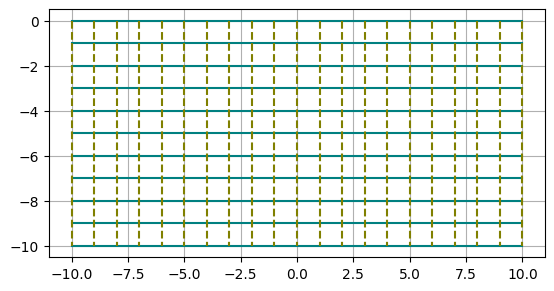

In [ ]:
N = 200

class hline():
  def __init__(self, a, b, y):
    self.xs = np.linspace(a, b, N+1)
    self.ys = np.ones_like(self.xs) * y
    self.color = 'teal'
    self.ls = '-'
    self.label = None

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def draw(self):
    plt.plot(self.xs, self.ys, self.color, ls=self.ls, label=self.label)

class vline():
  def __init__(self, c, d, x):
    self.ys = np.linspace(c, d, N+1)
    self.xs = np.ones_like(self.ys) * x
    self.color = 'olive'
    self.ls = '--'
    self.label = None

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def draw(self):
    plt.plot(self.xs, self.ys, self.color, ls=self.ls, label=self.label)

class xygrid():
  def __init__(self, xrange, yrange, xnum, ynum):
    self.a, self.b = xrange
    self.c, self.d = yrange
    xstep = (xrange[1] - xrange[0]) / xnum
    ystep = (yrange[1] - yrange[0]) / ynum
    self.hors = [hline(self.a, self.b, yrange[0] + ystep * k) for k in range(ynum+1)]
    self.vers = [vline(self.c, self.d, xrange[0] + xstep * j) for j in range(xnum+1)]
    self.hlabel = None
    self.vlabel = None

  def draw(self):
    for ho in self.hors:
      ho.draw()
    for vo in self.vers:
      vo.draw()

# 수면 아래 격자 모양의 물체
xrange = [-10, 10]
yrange = [0, -10]
xnum = 20
ynum = 10

obj1 = xygrid(xrange, yrange, xnum, ynum)

obj1.hors[0].label = 'object'
obj1.vers[0].label = 'object'

plt.axes().set_aspect('equal')
obj1.draw()

plt.grid()

## 물 밖에서 본 상

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in divide
  return n_1*(-A + x)/sqrt(B**2 + (-A + x)**2) + n_2*(-C + x)/sqrt(D**2 + (C - x)**2)
<ipython-input-31-d5e6ebeb90d7>:19: RuntimeWarning: invalid value encountered in scalar divide
  p = (nrel**2 - 1) * (alpha/d)**2


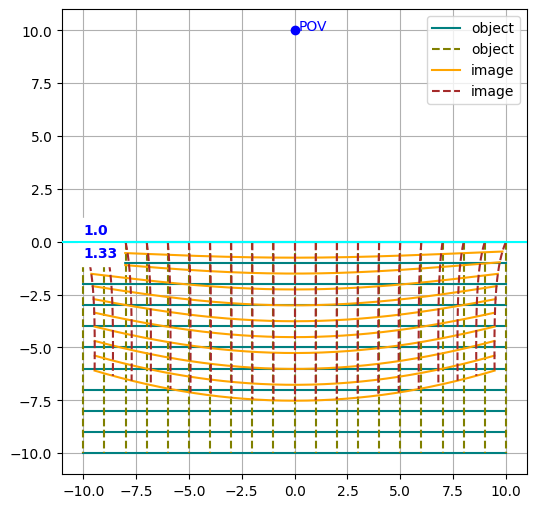

In [ ]:
pov = [0, 10]

class iline():
  def __init__(self, obj):
    self.xs = obj.xs
    self.ys = obj.ys
    self.color = 'gray'
    self.ls = '-'
    self.label = None
    self.imageloc = np.empty((0, 2))
    self.OBJs = np.empty((0, 2))

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def calc_xy(self, POV, nrel):
    self.OBJs = np.array([self.xs, self.ys]).T
    self.imageloc = np.array([refimg(POV, obj, nrel)[0] for obj in self.OBJs])

  def draw(self):
    plt.plot(self.imageloc.T[0], self.imageloc.T[1], self.color, ls=self.ls, label=self.label)
#
# 격자 모양 물체의 상
plt.figure(figsize=(6, 9))
plt.axes().set_aspect('equal')

himgs = [iline(hl) for hl in obj1.hors]
vimgs = [iline(vl) for vl in obj1.vers]

himgs[0].label = 'image'
vimgs[0].label = 'image'

obj1.draw()

for hi in himgs:
  hi.calc_xy(pov, n_water/n_air)
  hi.set_color('orange')
  hi.set_linestyle('-')
  hi.draw()

for vi in vimgs:
  vi.calc_xy(pov, n_water/n_air)
  vi.set_color('brown')
  vi.set_linestyle('--')
  vi.draw()

plt.plot(pov[0], pov[1], 'o', color='b')
plt.text(pov[0]+0.2, pov[1], 'POV', color='b')

plt.grid()

plt.text(xrange[0], 0.2, str(n_air), color='b', va='bottom', ha='left', \
         weight='bold', backgroundcolor='white')
plt.text(xrange[0], -0.2, str(n_water), color='b', va='top', ha='left', \
         weight='bold', backgroundcolor='white')
plt.axhline(0, c='cyan', zorder=3)

plt.legend(loc='upper right')

- 수면에서 수심과 비교할 만한 거리 이상으로 어느 정도 떨어져서 보면 약간의 왜곡 외에 특이한 점은 별로 없고 전체적으로 굴절률 비율 정도로 얕아져 보일 뿐이다.

## POV가 주어졌을 때 상을 구하는 클래스

In [ ]:
class refraction_image():
  def __init__(self, obj, pov, nrel):
    self.hlines = obj.hors
    self.vlines = obj.vers
    self.pov = pov
    self.nrel = nrel
    self.himgs = [iline(hl) for hl in self.hlines]
    self.vimgs = [iline(vl) for vl in self.vlines]
    self.himgs[0].label = 'image'
    self.vimgs[0].label = 'image'
    self.legend_loc = 'upper right' if nrel > 1 else 'lower right'

    for hi in self.himgs:
      hi.set_color('orange')
      hi.set_linestyle('-')
    for vi in self.vimgs:
      vi.set_color('brown')
      vi.set_linestyle('--')
    for hi in self.himgs:
      hi.calc_xy(self.pov, self.nrel)
    for vi in self.vimgs:
      vi.calc_xy(self.pov, self.nrel)

  def draw(self):
    plt.grid()
    plt.plot(self.pov[0], self.pov[1], 'o', color='b')
    plt.text(self.pov[0]+0.2, self.pov[1], 'POV', color='b')
    xn = self.hlines[0].xs[0]

    for hi in self.himgs:
      hi.draw()
    for vi in self.vimgs:
      vi.draw()

    plt.text(xn, 0.2, str(n_air), color='b', va='bottom', ha='left',\
             weight='bold', backgroundcolor='white')
    plt.text(xn, -0.2, str(n_water), color='b', va='top', ha='left', \
             weight='bold', backgroundcolor='white')

    plt.axhline(0, c='cyan', zorder=3, label='water surface')


    plt.legend(loc=self.legend_loc)
#

<ipython-input-31-d5e6ebeb90d7>:19: RuntimeWarning: invalid value encountered in scalar divide
  p = (nrel**2 - 1) * (alpha/d)**2


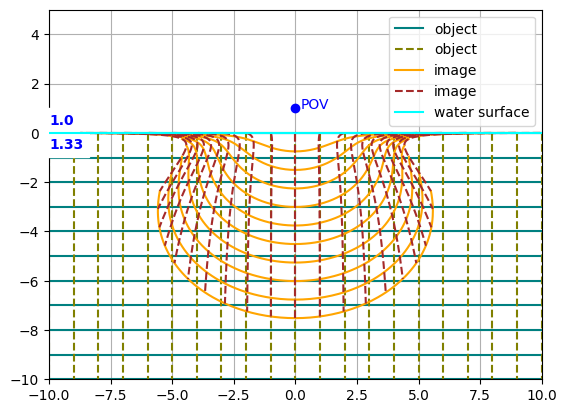

In [ ]:
pov1 = [0, 1]
img1 = refraction_image(obj1, pov1, n_water/n_air)

plt.axes().set_aspect('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 5)
obj1.draw()
img1.draw()

plt.savefig('fishjar.png')
plt.savefig('fishjar.svg')

- 수심에 비해 수면에 매우 가까이 다가가서 내려다보면 POV 연직 아래는 굴절률 비율로 얕아져 보이는 점은 같지만 주변 공간은 어항 모양의 작은 공간에 압축되어 보인다.

<ipython-input-31-d5e6ebeb90d7>:19: RuntimeWarning: invalid value encountered in scalar divide
  p = (nrel**2 - 1) * (alpha/d)**2


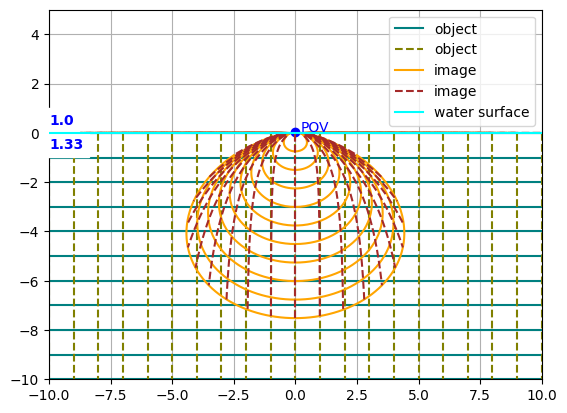

In [ ]:
pov2 = [0, delta]
img2 = refraction_image(obj1, pov2, n_water/n_air)

plt.axes().set_aspect('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 5)
obj1.draw()
img2.draw()

plt.savefig('seashell_shape.png')
plt.savefig('seashell_shape.svg')

- 수면에 극단적으로 가까이 가서 보면 물 속 전체 공간은 가로, 세로, 깊이가 모두 물의 깊이에 비례하는 작은 공간(바닥면의 상 내부)에 압축되어 보인다. 상의 깊이는 물 깊이를 상대 굴절률로 나눈 값이다.

# 물 밖 공간을 물 속에서 올려다 본 상 (스넬의 창)

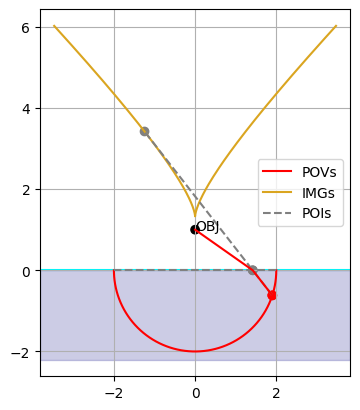

In [ ]:
o2 = [0,1]
phis = np.linspace(0, np.pi, 201)
r = 2
xs = r * np.cos(phis)
ys = -r * np.sin(phis)
imgpois = np.array([refimg([x,y], o2, 1/1.33) for x, y in zip(xs, ys)])
imgs, pois = np.moveaxis(imgpois, 0,-1)

k=20
sample = np.array([[xs[k], ys[k]], [pois[0][k], pois[1][k]], [imgs[0][k], imgs[1][k]]])
ray = np.array([[o2[0], o2[1]], [pois[0][k], pois[1][k]], [xs[k], ys[k]]])

plt.figure(figsize=(4, 6))
plt.axes().set_aspect('equal')

plt.grid()
plt.plot(xs, ys, 'r-', label="POVs")
plt.axhline(0, c='cyan', zorder=-3)
plt.axhspan(0, -1.1*r, color='navy', alpha=0.2, zorder=-3)
plt.plot(imgs[0], imgs[1], ls='-', color='goldenrod', label="IMGs")
plt.plot(pois[0], pois[1], '--', color='gray', label="POIs")
plt.plot(sample.T[0], sample.T[1], ls='--', color='gray')
plt.scatter(sample.T[0], sample.T[1], color=['r', 'gray', 'gray'])
plt.plot(ray.T[0], ray.T[1], color='r')
plt.scatter(ray.T[0], ray.T[1], color=['k', 'gray', 'r'])
plt.text(o2[0], o2[1], "OBJ")
plt.legend()



- 물 밖 공간 속의 격자 구조를 정의하고,
- 물 속 관측점(POV)에서 본 격자의 상을 구한다.

In [ ]:
# POV는 y < 0 에 두고, 물체는 y > 0에 둔다.
# 상대 굴절률은 관측점이 위치한 곳의 굴절률(n2)에 대한 물체가 들어있는 매질의 굴절률(n1)의 비율로 한다.
refimg(pov=[0, -1], obj=[1, 1], nrel=n_air/n_water)

(array([1.08830882, 1.64067461]), array([0.41213288, 0.        ]))

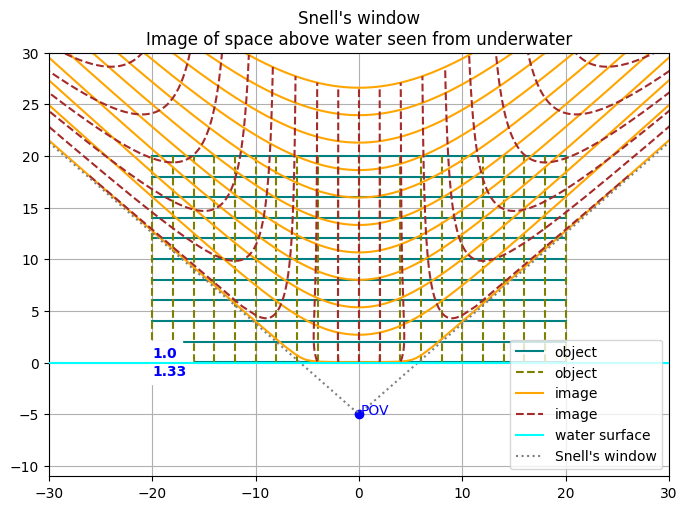

In [ ]:
# y 값 범위에서 수면은 제외하고 바로 위부터 포함한다. y >= delta
obj2 = xygrid([-20,20], [delta,20], 20, 10)

obj2.hors[0].label = 'object'
obj2.vers[0].label = 'object'

pov3 = [0, -5]
nrel2 = n_air/n_water
img3 = refraction_image(obj2, pov3, nrel2)

plt.figure(figsize=(8, 6))
plt.axes().set_aspect('equal')
plt.xlim(-30, 30)
plt.ylim(-11, 30)

obj2.draw()
img3.draw()

# Snell's window by theory
sc = nrel2
cc = np.sqrt(1-nrel2**2)
k2 = cc / sc
y1f = lambda x: pov3[1] + k2 * (x - pov3[0])
y2f = lambda x: pov3[1] - k2 * (x - pov3[0])
yf = np.vectorize(lambda x: y1f(x) if x >= pov3[0] else y2f(x))
xmin, xmax = -30, 30
xs = np.linspace(xmin, xmax, 100)
ys = yf(xs)
plt.plot(xs, ys, 'gray', ls=':', label='Snell\'s window')
plt.legend(loc='lower right')

plt.title("Snell's window\nImage of space above water seen from underwater")
plt.savefig('snell_window.png')
plt.savefig('snell_window.svg')

- 스넬의 창(원) 연직 위의 모습은 큰 왜곡 없이 거리만 굴절률의 비율에 가깝게 멀어져 보이는 반면, 스넬의 창 바깥 부분은, 방향은 원뿔 안으로 모이는 반면 거리는 늘어나 왜곡되는데, 특히 수면 가까운 곳일수록 왜곡이 심한 것을 볼 수 있다.

In [ ]:
img3.himgs[0].imageloc.T[0].min()

-1411722.4685739113